In [5]:
from Bio.SeqUtils import MeltingTemp as mt
from Bio.Seq import Seq
import random

def generate_dna(target_tm):
    sequence = ""
    gc_content = 0
    gc_fraction = 0
    while True:
        if gc_fraction < 0.4:
            new_base = random.choice(['G', 'C'])
        elif gc_fraction > 0.6:
            new_base = random.choice(['A', 'T'])
        else:
            new_base = random.choice(['A', 'T', 'G', 'C'])

        sequence += new_base
        gc_content += new_base in ['G', 'C']
        gc_fraction = gc_content / len(sequence)
        tm = mt.Tm_NN(Seq(sequence), Na=50, Mg=7)

        if tm >= target_tm:
            break
    return sequence

print(generate_dna(80))


GTGAATCCATCGAAATGACGCGGCGTCCTCGCAAAGGT


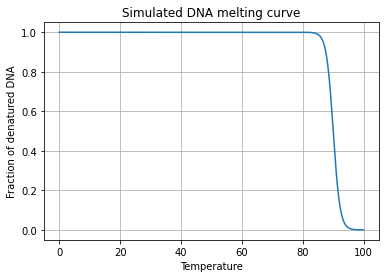

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def delta_t(Tm, A=100, B=0.05):
    return A * np.exp(-B * Tm)


# Simulate a melting curve
T = np.linspace(0, 100, 1000)  # temperatures from 0 to 100
tm = 90  # melting temperature
delta_t = delta_t(tm)  # change in temperature
y = boltzmann_sigmoid(T, tm, -delta_t)

plt.plot(T, y)
plt.xlabel('Temperature')
plt.ylabel('Fraction of denatured DNA')
plt.title('Simulated DNA melting curve')
plt.grid(True)
plt.show()

